<a href="https://colab.research.google.com/github/mimomaina/Machinelearning001/blob/main/Moore's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Load in the dataset**

In [2]:
df = pd.read_csv('/content/chip_dataset.csv')

In [3]:
df_copy = df.copy()

# Data Cleaning

1. Missingness in the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [5]:
#percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

,0
Unnamed: 0,0.000000
Product,0.000000
Type,0.000000
Release Date,0.000000
Process Size (nm),0.185414
TDP (W),12.896580
Die Size (mm^2),14.730119
Transistors (million),14.647713
Freq (MHz),0.000000
Foundry,0.000000


a. Numerical data

In [6]:
# drop FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
df = df.drop(['FP16 GFLOPS','FP32 GFLOPS','FP64 GFLOPS'], axis=1)

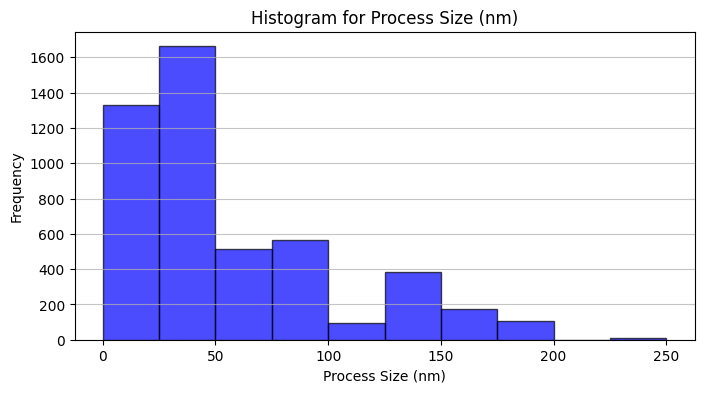

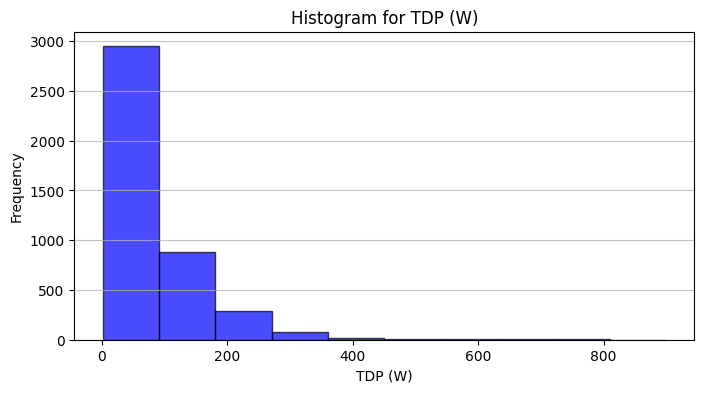

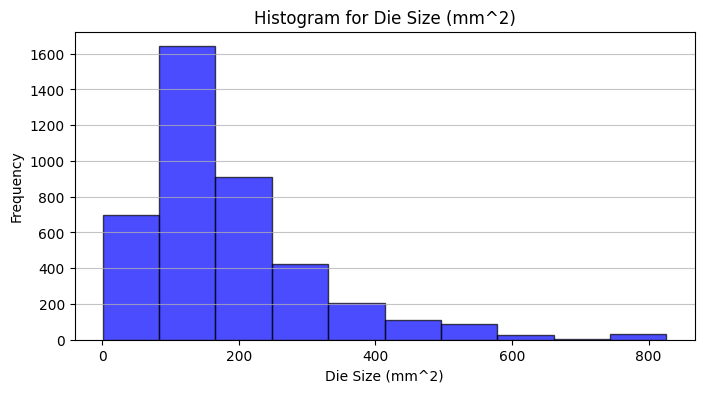

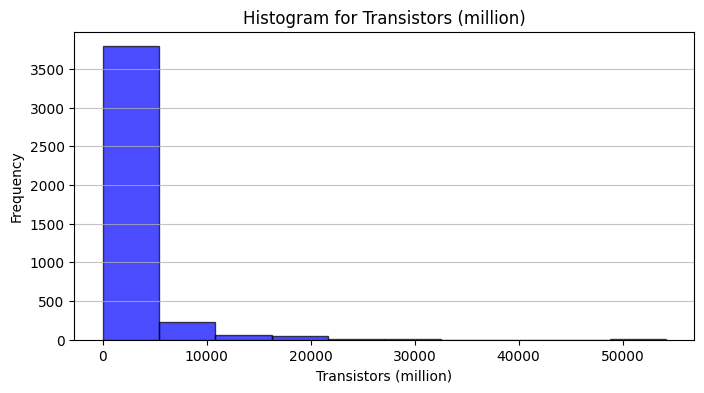

In [7]:
columns_of_interest = ['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)']

# Plot histograms for the specified columns
for col in columns_of_interest:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=10, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


In [8]:
#find median for the Transistor colum and fill the null values with the median
median_transistors = df['Transistors (million)'].median()
df['Transistors (million)'].fillna(median_transistors, inplace=True)

<ipython-input-8-cb2bfb3c5b49>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transistors (million)'].fillna(median_transistors, inplace=True)


In [9]:
#find median for the Die Size (mm^2) column and fill the null values with the median
median_die_size = df['Die Size (mm^2)'].median()
df['Die Size (mm^2)'].fillna(median_die_size, inplace=True)

<ipython-input-9-4668602a8e3e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Die Size (mm^2)'].fillna(median_die_size, inplace=True)


In [10]:
#find median for the 'TDP (W) column and fill the null values with the median
median_TDP = df['TDP (W)'].median()
df['TDP (W)'].fillna(median_TDP, inplace=True)



<ipython-input-10-5ea21f8fddf1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TDP (W)'].fillna(median_TDP, inplace=True)


In [11]:
#find median for the Process Size (nm) column and fill the null values with the median
median_process_size = df['Process Size (nm)'].median()
df['Process Size (nm)'].fillna(median_process_size, inplace=True)

<ipython-input-11-073564806560>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Process Size (nm)'].fillna(median_process_size, inplace=True)


b.Categorical data

Importing encoding utilities

In [12]:
pip install -U scikit-learn


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4854 non-null   float64
 5   TDP (W)                4854 non-null   float64
 6   Die Size (mm^2)        4854 non-null   float64
 7   Transistors (million)  4854 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 417.3+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Encode the 'Vendor' column
df['Vendor_Encoded'] = label_encoder.fit_transform(df['Vendor'])

print(df)

# View the mapping of categories to numbers
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


      Unnamed: 0                  Product Type Release Date  \
0              0      AMD Athlon 64 3500+  CPU   2007-02-20   
1              1         AMD Athlon 200GE  CPU   2018-09-06   
2              2     Intel Core i5-1145G7  CPU   2020-09-02   
3              3    Intel Xeon E5-2603 v2  CPU   2013-09-01   
4              4  AMD Phenom II X4 980 BE  CPU   2011-05-03   
...          ...                      ...  ...          ...   
4849        4849      NVIDIA Quadro 3000M  GPU   2011-02-22   
4850        4850            Intel GMA 950  GPU   2005-06-01   
4851        4851   NVIDIA GeForce GT 320M  GPU   2010-03-03   
4852        4852   NVIDIA GeForce FX 5200  GPU   2003-03-06   
4853        4853   NVIDIA GeForce 9300 SE  GPU   2008-06-01   

      Process Size (nm)  TDP (W)  Die Size (mm^2)  Transistors (million)  \
0                  65.0     45.0             77.0                  122.0   
1                  14.0     35.0            192.0                 4800.0   
2              

In [16]:
label_encoder = LabelEncoder()

# Encode the 'Foundry' column
df['Foundry_Encoded'] = label_encoder.fit_transform(df['Foundry'])

print(df)

# View the mapping of categories to numbers
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

      Unnamed: 0                  Product Type Release Date  \
0              0      AMD Athlon 64 3500+  CPU   2007-02-20   
1              1         AMD Athlon 200GE  CPU   2018-09-06   
2              2     Intel Core i5-1145G7  CPU   2020-09-02   
3              3    Intel Xeon E5-2603 v2  CPU   2013-09-01   
4              4  AMD Phenom II X4 980 BE  CPU   2011-05-03   
...          ...                      ...  ...          ...   
4849        4849      NVIDIA Quadro 3000M  GPU   2011-02-22   
4850        4850            Intel GMA 950  GPU   2005-06-01   
4851        4851   NVIDIA GeForce GT 320M  GPU   2010-03-03   
4852        4852   NVIDIA GeForce FX 5200  GPU   2003-03-06   
4853        4853   NVIDIA GeForce 9300 SE  GPU   2008-06-01   

      Process Size (nm)  TDP (W)  Die Size (mm^2)  Transistors (million)  \
0                  65.0     45.0             77.0                  122.0   
1                  14.0     35.0            192.0                 4800.0   
2              

In [17]:
df['Product'].unique()

array(['AMD Athlon 64 3500+', 'AMD Athlon 200GE', 'Intel Core i5-1145G7',
       ..., 'NVIDIA GeForce FX Go5100', 'NVIDIA Quadro 3000M',
       'NVIDIA GeForce 9300 SE'], dtype=object)

In [18]:
# Display all unique values in the 'Product' column
unique_products = df['Product'].unique().tolist()
print(unique_products)



['AMD Athlon 64 3500+', 'AMD Athlon 200GE', 'Intel Core i5-1145G7', 'Intel Xeon E5-2603 v2', 'AMD Phenom II X4 980 BE', 'Intel Xeon E5-2470 v2', 'AMD Phenom X4 9750 (125W)', 'Intel Pentium D 930', 'Intel Core i3-1125G4', 'AMD Athlon 64 X2 4200+', 'AMD Sempron 2800+', 'Intel Core i7-3632QM', 'AMD C-70', 'Intel Core i5-8269U', 'AMD Phenom X4 9600 BE', 'Intel Pentium 3560Y', 'AMD Turion X2 Ultra ZM-84', 'Intel Pentium 4 506', 'Intel Xeon E5-2430 v2', 'AMD Athlon 64 X2 4800+', 'Intel Core i5-3427U', 'AMD Opteron 148 HE', 'AMD Athlon 1100', 'Intel Core i7-975', 'Intel Pentium 4 HT 672', 'Intel Pentium D 830', 'AMD EPYC 7371', 'Intel Pentium 4 HT 550', 'Intel Pentium III 1266S', 'AMD Sempron 140', 'AMD EPYC 7501', 'Intel Atom E680', 'Intel Xeon E5-2690 v2', 'Intel Xeon Platinum 8380', 'Intel Xeon Phi 7120A', 'Intel Core i3-8020', 'Intel Atom S1220', 'AMD Phenom X4 9600', 'Intel Core i3-2330M', 'AMD Opteron X2 180', 'AMD E2-3200', 'AMD Turion 64 MT-34', 'Intel Pentium III  866', 'Intel Core 2

In [19]:
# Get unique values along with their counts
print(df['Product'].value_counts())


Product
AMD Athlon 64 3200+         12
AMD Sempron 3000+           10
AMD Athlon 64 3000+         10
Intel HD Graphics           10
AMD Athlon 64 3500+          9
                            ..
AMD Opteron 6276             1
AMD Opteron 6278             1
Intel Xeon E5-1620 v2        1
AMD Phenom X4 9750 (95W)     1
NVIDIA GeForce 9300 SE       1
Name: count, Length: 4278, dtype: int64


In [20]:
# Filter rows with 'AMD' in the 'Product' column
amd_products = df[df['Product'].str.contains('AMD', na=False)]
#print(amd_products)


from IPython.display import display

# Display all rows in an interactive scrollable format
display(amd_products)

# Save filtered results to CSV
amd_products.to_csv('amd_products.csv', index=False)




,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,Vendor_Encoded,Foundry_Encoded
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,0,9
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,0,9
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,0,9
6,6,AMD Phenom X4 9750 (125W),CPU,2008-03-27,65.0,125.0,285.0,450.0,2400.0,Unknown,AMD,0,9
9,9,AMD Athlon 64 X2 4200+,CPU,2006-05-23,90.0,89.0,156.0,154.0,2200.0,Unknown,AMD,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,4829,AMD Radeon R5 220 OEM,GPU,2013-12-21,40.0,19.0,59.0,292.0,650.0,TSMC,AMD,0,7
4830,4830,AMD Radeon RX 550X Mobile,GPU,2018-04-11,14.0,50.0,103.0,2200.0,1100.0,GF,AMD,0,0
4833,4833,AMD Radeon R9 280X2,GPU,NaT,28.0,375.0,352.0,4313.0,950.0,TSMC,AMD,0,7
4836,4836,AMD Radeon Instinct MI25,GPU,2017-06-27,14.0,300.0,495.0,12500.0,1400.0,GF,AMD,0,0


In [21]:
# Filter rows with 'Intel' in the 'Product' column
intel_products = df[df['Product'].str.contains('Intel', na=False)]
#print(intel_products)


from IPython.display import display

# Display all rows in an interactive scrollable format
display(intel_products)

# Save filtered results to CSV
intel_products.to_csv('intel_products.csv', index=False)




,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,Vendor_Encoded,Foundry_Encoded
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,148.0,624.0,2600.0,Intel,Intel,2,2
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,2,2
5,5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22.0,95.0,160.0,1400.0,2400.0,Intel,Intel,2,2
7,7,Intel Pentium D 930,CPU,2006-01-16,65.0,130.0,140.0,376.0,3000.0,Intel,Intel,2,2
8,8,Intel Core i3-1125G4,CPU,2020-09-02,10.0,28.0,148.0,624.0,2000.0,Intel,Intel,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,4753,Intel HD Graphics,GPU,2011-05-01,32.0,65.0,131.0,504.0,350.0,Intel,Intel,2,2
4757,4757,Intel HD Graphics,GPU,2015-04-01,14.0,6.0,148.0,624.0,500.0,Intel,Intel,2,2
4788,4788,Intel HD Graphics P3000,GPU,2011-02-01,32.0,65.0,149.0,624.0,850.0,Intel,Intel,2,2
4815,4815,Intel GMA X4700MHD,GPU,2008-10-01,65.0,13.0,148.0,624.0,640.0,Intel,Intel,2,2


In [22]:
# Filter rows with 'ATI' in the 'Product' column
ati_products = df[df['Product'].str.contains('ATI', na=False)]
#print(ati_products)


from IPython.display import display

# Display all rows in an interactive scrollable format
display(ati_products)

# Save filtered results to CSV
ati_products.to_csv('ati_products.csv', index=False)




,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,Vendor_Encoded,Foundry_Encoded
2196,2196,ATI Radeon HD 4350 AGP,GPU,2008-09-30,55.0,20.0,73.0,242.0,600.0,TSMC,ATI,1,7
2198,2198,ATI Radeon X700 AGP,GPU,2004-09-01,110.0,44.0,156.0,120.0,400.0,TSMC,ATI,1,7
2200,2200,ATI Radeon HD 2900 PRO,GPU,2007-12-12,80.0,200.0,420.0,720.0,600.0,TSMC,ATI,1,7
2210,2210,ATI Radeon E4690 MXM,GPU,2009-06-01,55.0,30.0,146.0,514.0,600.0,TSMC,ATI,1,7
2218,2218,ATI Xbox 360 GPU 80nm,GPU,2007-10-27,80.0,175.0,181.0,232.0,500.0,TSMC,ATI,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,4825,ATI Radeon HD 3410,GPU,2009-05-07,65.0,20.0,85.0,180.0,519.0,TSMC,ATI,1,7
4826,4826,ATI Radeon 9800 PRO,GPU,2003-03-01,150.0,47.0,215.0,117.0,380.0,TSMC,ATI,1,7
4834,4834,ATI Mobility Radeon 9200,GPU,2003-03-01,150.0,65.0,81.0,36.0,200.0,UMC,ATI,1,8
4843,4843,ATI Mobility Radeon HD 4870,GPU,2009-01-09,55.0,65.0,256.0,956.0,550.0,TSMC,ATI,1,7


In [23]:
# Filter rows with 'NVIDIA' in the 'Product' column
nvidia_products = df[df['Product'].str.contains('NVIDIA', na=False)]
#print(amd_products)


from IPython.display import display

# Display all rows in an interactive scrollable format
display(nvidia_products)

# Save filtered results to CSV
nvidia_products.to_csv('nvidia_products.csv', index=False)




,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,Vendor_Encoded,Foundry_Encoded
2194,2194,NVIDIA GeForce MX150 GP107,GPU,2019-02-23,14.0,25.0,132.0,3300.0,1469.0,Samsung,NVIDIA,3,5
2197,2197,NVIDIA GeForce 7100 GS,GPU,2006-08-08,110.0,65.0,110.0,75.0,350.0,TSMC,NVIDIA,3,7
2199,2199,NVIDIA GeForce 6800 XT,GPU,2005-09-30,130.0,65.0,225.0,222.0,425.0,TSMC,NVIDIA,3,7
2201,2201,NVIDIA ION,GPU,2008-06-03,65.0,20.0,144.0,314.0,450.0,Unknown,NVIDIA,3,9
2206,2206,NVIDIA GeForce GTX 760 OEM,GPU,2013-06-27,28.0,130.0,294.0,3540.0,823.0,TSMC,NVIDIA,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,4848,NVIDIA GeForce FX Go5100,GPU,2003-03-01,150.0,65.0,124.0,45.0,200.0,TSMC,NVIDIA,3,7
4849,4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,3,7
4851,4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,3,7
4852,4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,65.0,65.0,29.0,250.0,TSMC,NVIDIA,3,7


In [24]:
# Filter rows with 'Other' in the 'Vendor' column
other_products = df[df['Vendor'].str.contains('Other', na=False)]
#print(other_products)


from IPython.display import display

# Display all rows in an interactive scrollable format
display(other_products)


# Save filtered results to CSV
other_products.to_csv('other_products.csv', index=False)



,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,Vendor_Encoded,Foundry_Encoded
2193,2193,Matrox Parhelia 128 MB,GPU,2002-06-25,150.0,65.0,174.0,80.0,200.0,UMC,Other,4,8
2237,2237,3dfx Spectre 1000,GPU,NaT,180.0,30.0,131.0,30.0,200.0,TSMC,Other,4,7
2239,2239,Matrox QID LP PCIe,GPU,2004-12-17,0.0,65.0,148.0,624.0,250.0,UMC,Other,4,8
2270,2270,3dfx Spectre 2000,GPU,NaT,40.0,30.0,131.0,30.0,200.0,TSMC,Other,4,7
2290,2290,XGI Volari Duo V5 Ultra,GPU,2003-09-15,130.0,65.0,148.0,90.0,350.0,UMC,Other,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,4640,3dfx Voodoo5 6000,GPU,NaT,250.0,60.0,112.0,14.0,166.0,TSMC,Other,4,7
4725,4725,Matrox Millennium G450,GPU,NaT,180.0,65.0,148.0,10.0,125.0,UMC,Other,4,8
4731,4731,3dfx Voodoo4-2 4000 AGP,GPU,NaT,180.0,15.0,112.0,14.0,166.0,TSMC,Other,4,7
4842,4842,Matrox Millennium G450 x4 MMS,GPU,2002-06-19,180.0,65.0,148.0,10.0,125.0,UMC,Other,4,8


In [25]:
amd = pd.read_csv('/content/amd_products.csv')

In [26]:
ati = pd.read_csv('/content/ati_products.csv')

In [27]:
intel = pd.read_csv('/content/intel_products.csv')

In [28]:
nvidia = pd.read_csv('/content/nvidia_products.csv')

In [29]:
other = pd.read_csv('/content/other_products.csv')

In [30]:
# Factorize Product within each dataset
amd['Product_Encoded'] = pd.factorize(amd['Product'])[0]
ati['Product_Encoded'] = pd.factorize(ati['Product'])[0]
intel['Product_Encoded'] = pd.factorize(intel['Product'])[0]
nvidia['Product_Encoded'] = pd.factorize(nvidia['Product'])[0]
other['Product_Encoded'] = pd.factorize(other['Product'])[0]


In [31]:
print(amd.head())


   Unnamed: 0                    Product Type Release Date  Process Size (nm)  \
0           0        AMD Athlon 64 3500+  CPU   2007-02-20               65.0   
1           1           AMD Athlon 200GE  CPU   2018-09-06               14.0   
2           4    AMD Phenom II X4 980 BE  CPU   2011-05-03               45.0   
3           6  AMD Phenom X4 9750 (125W)  CPU   2008-03-27               65.0   
4           9     AMD Athlon 64 X2 4200+  CPU   2006-05-23               90.0   

   TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry  \
0     45.0             77.0                  122.0      2200.0  Unknown   
1     35.0            192.0                 4800.0      3200.0  Unknown   
2    125.0            258.0                  758.0      3700.0  Unknown   
3    125.0            285.0                  450.0      2400.0  Unknown   
4     89.0            156.0                  154.0      2200.0  Unknown   

  Vendor  Vendor_Encoded  Foundry_Encoded  Product_Encoded  
0

In [32]:
print(ati.head())

   Unnamed: 0                 Product Type Release Date  Process Size (nm)  \
0        2196  ATI Radeon HD 4350 AGP  GPU   2008-09-30               55.0   
1        2198     ATI Radeon X700 AGP  GPU   2004-09-01              110.0   
2        2200  ATI Radeon HD 2900 PRO  GPU   2007-12-12               80.0   
3        2210    ATI Radeon E4690 MXM  GPU   2009-06-01               55.0   
4        2218   ATI Xbox 360 GPU 80nm  GPU   2007-10-27               80.0   

   TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz) Foundry Vendor  \
0     20.0             73.0                  242.0       600.0    TSMC    ATI   
1     44.0            156.0                  120.0       400.0    TSMC    ATI   
2    200.0            420.0                  720.0       600.0    TSMC    ATI   
3     30.0            146.0                  514.0       600.0    TSMC    ATI   
4    175.0            181.0                  232.0       500.0    TSMC    ATI   

   Vendor_Encoded  Foundry_Encoded  Product_

In [33]:
print(intel.head())

   Unnamed: 0                Product Type Release Date  Process Size (nm)  \
0           2   Intel Core i5-1145G7  CPU   2020-09-02               10.0   
1           3  Intel Xeon E5-2603 v2  CPU   2013-09-01               22.0   
2           5  Intel Xeon E5-2470 v2  CPU   2013-09-01               22.0   
3           7    Intel Pentium D 930  CPU   2006-01-16               65.0   
4           8   Intel Core i3-1125G4  CPU   2020-09-02               10.0   

   TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz) Foundry Vendor  \
0     28.0            148.0                  624.0      2600.0   Intel  Intel   
1     80.0            160.0                 1400.0      1800.0   Intel  Intel   
2     95.0            160.0                 1400.0      2400.0   Intel  Intel   
3    130.0            140.0                  376.0      3000.0   Intel  Intel   
4     28.0            148.0                  624.0      2000.0   Intel  Intel   

   Vendor_Encoded  Foundry_Encoded  Product_Encode

In [34]:
print(nvidia.head())

   Unnamed: 0                     Product Type Release Date  \
0        2194  NVIDIA GeForce MX150 GP107  GPU   2019-02-23   
1        2197      NVIDIA GeForce 7100 GS  GPU   2006-08-08   
2        2199      NVIDIA GeForce 6800 XT  GPU   2005-09-30   
3        2201                  NVIDIA ION  GPU   2008-06-03   
4        2206  NVIDIA GeForce GTX 760 OEM  GPU   2013-06-27   

   Process Size (nm)  TDP (W)  Die Size (mm^2)  Transistors (million)  \
0               14.0     25.0            132.0                 3300.0   
1              110.0     65.0            110.0                   75.0   
2              130.0     65.0            225.0                  222.0   
3               65.0     20.0            144.0                  314.0   
4               28.0    130.0            294.0                 3540.0   

   Freq (MHz)  Foundry  Vendor  Vendor_Encoded  Foundry_Encoded  \
0      1469.0  Samsung  NVIDIA               3                5   
1       350.0     TSMC  NVIDIA               3  

In [35]:
print(other.head())

   Unnamed: 0                  Product Type Release Date  Process Size (nm)  \
0        2193   Matrox Parhelia 128 MB  GPU   2002-06-25              150.0   
1        2237        3dfx Spectre 1000  GPU          NaT              180.0   
2        2239       Matrox QID LP PCIe  GPU   2004-12-17                0.0   
3        2270        3dfx Spectre 2000  GPU          NaT               40.0   
4        2290  XGI Volari Duo V5 Ultra  GPU   2003-09-15              130.0   

   TDP (W)  Die Size (mm^2)  Transistors (million)  Freq (MHz) Foundry Vendor  \
0     65.0            174.0                   80.0       200.0     UMC  Other   
1     30.0            131.0                   30.0       200.0    TSMC  Other   
2     65.0            148.0                  624.0       250.0     UMC  Other   
3     30.0            131.0                   30.0       200.0    TSMC  Other   
4     65.0            148.0                   90.0       350.0     UMC  Other   

   Vendor_Encoded  Foundry_Encoded  Pr

# 1.Moore's Law still holds, especially in GPUs.

<ipython-input-75-4bbdd62dd2f6>:20: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



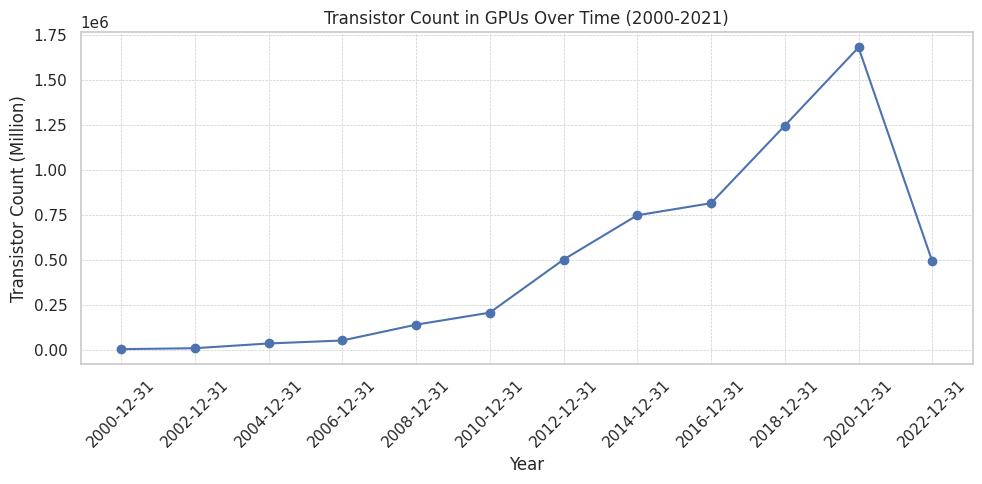

In [75]:
# Convert 'Release Date' to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Filter the data to only include GPUs and releases between 2000 and 2021
gpu_data = df[(df['Type'] == 'GPU') & (df['Release Date'].between('2000-01-01', '2021-12-31'))]

# Group by the year of 'Release Date' and sum transistor counts for each year
transistor_counts = gpu_data.groupby(gpu_data['Release Date'].dt.year)['Transistors (million)'].sum().reset_index()

# Set the year as the index for easier plotting and convert it to DatetimeIndex
transistor_counts['Release Date'] = pd.to_datetime(transistor_counts['Release Date'], format='%Y')
transistor_counts.set_index('Release Date', inplace=True)

# Resample the data to get sums at two-year intervals
transistor_counts = transistor_counts.resample('2Y').sum()

# Plot the transistor count data
plt.figure(figsize=(10, 5))
plt.plot(transistor_counts.index, transistor_counts['Transistors (million)'], marker='o', color='b')

# Adding labels and title
plt.title('Transistor Count in GPUs Over Time (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Transistor Count (Million)')
plt.xticks(transistor_counts.index, rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


In [73]:
import plotly.express as px

# Plot Process Size (nm) vs. Year for High-end vs Low-end GPUs using Plotly
fig = px.scatter(
    df,
    x='Year',
    y='Process Size (nm)',
    color='GPU_Type',
    symbol='GPU_Type',
    title='Process Size (nm) vs. Year for High-end vs Low-end GPUs',
    labels={'Year': 'Year', 'Process Size (nm)': 'Process Size (nm)'},
    color_discrete_map={'High-end': 'red', 'Low-end': 'blue'}
)

# Show the interactive plot
fig.show()


In [71]:
# Convert 'Release Date' to datetime if not already in datetime format
gpu_data['Release Date'] = pd.to_datetime(gpu_data['Release Date'], errors='coerce')

# Extract the year from the 'Release Date' column
gpu_data['Year'] = gpu_data['Release Date'].dt.year

filtered_data = gpu_data[gpu_data['Year'] >= 2000]

# Display the filtered data
print(filtered_data)


      Unnamed: 0                     Product Type Release Date  \
2192        2192          Intel Xeon E3-1275  GPU   2011-04-03   
2193        2193      Matrox Parhelia 128 MB  GPU   2002-06-25   
2194        2194  NVIDIA GeForce MX150 GP107  GPU   2019-02-23   
2195        2195               Intel GMA 500  GPU   2008-03-02   
2196        2196      ATI Radeon HD 4350 AGP  GPU   2008-09-30   
...          ...                         ...  ...          ...   
4849        4849         NVIDIA Quadro 3000M  GPU   2011-02-22   
4850        4850               Intel GMA 950  GPU   2005-06-01   
4851        4851      NVIDIA GeForce GT 320M  GPU   2010-03-03   
4852        4852      NVIDIA GeForce FX 5200  GPU   2003-03-06   
4853        4853      NVIDIA GeForce 9300 SE  GPU   2008-06-01   

      Process Size (nm)  TDP (W)  Die Size (mm^2)  Transistors (million)  \
2192               32.0     95.0            216.0                 1160.0   
2193              150.0     65.0            174.0      

<ipython-input-71-8ac7df9faf74>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-71-8ac7df9faf74>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.info()

# 2.Dannard Scaling is still valid in general.


Dennard scaling is a set of rules that describes how the power density of transistors remains constant as their size decreases:
Power density: The power density of transistors remains constant as their size decreases.
Power use: Power use stays in proportion with area.
Voltage and current: Voltage and current scale with length

<ipython-input-46-d854c0d4c550>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Release Date'].dt.year


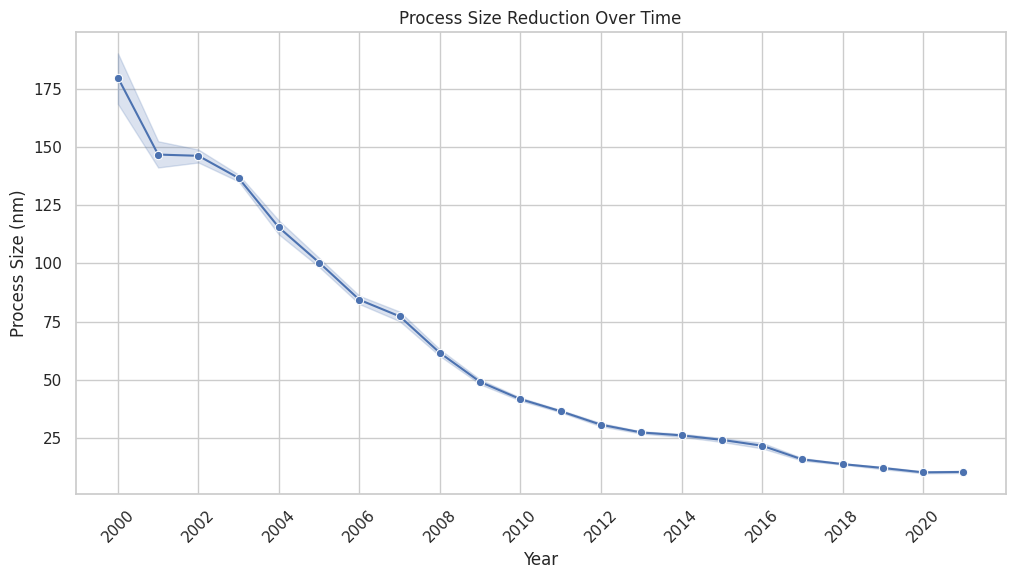

In [46]:
# Ensure 'Release Date' is in datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Drop rows with missing values in key columns
df = df.dropna(subset=['Release Date', 'Process Size (nm)', 'TDP (W)', 'Transistors (million)'])

# Extract the year from 'Release Date'
df['Year'] = df['Release Date'].dt.year

# Set Seaborn style
sns.set(style='whitegrid')

# Plot 1: Process Size vs. Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Process Size (nm)', marker='o')
plt.title('Process Size Reduction Over Time')
plt.xlabel('Year')
plt.ylabel('Process Size (nm)')
plt.xticks(range(df['Year'].min(), df['Year'].max() + 1, 2), rotation=45)
plt.show()

# Interpretation:
# Positive correlation between Process Size and TDP suggests Dennard Scaling might not fully hold.


Process size decreases over time, reflecting advancements in semiconductor fabrication.A reduction in process size should lead to more transistors being packed into the same chip area without increasing power density (if Dennard Scaling holds).

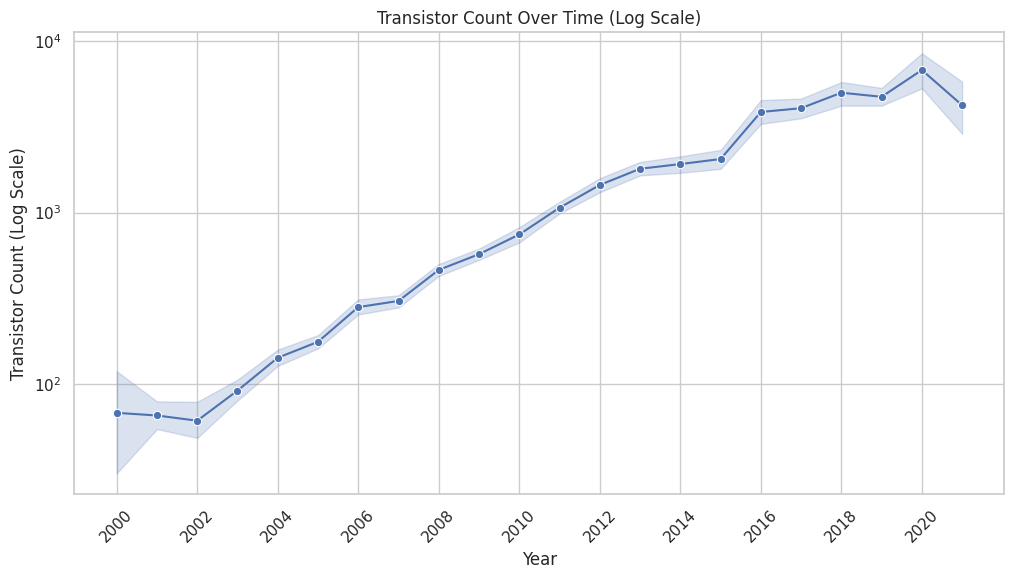

In [47]:
# Plot 2: Transistor Count vs. Year (Log Scale)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Transistors (million)', marker='o')
plt.yscale('log')
plt.title('Transistor Count Over Time (Log Scale)')
plt.xlabel('Year')
plt.ylabel('Transistor Count (Log Scale)')
plt.xticks(range(df['Year'].min(), df['Year'].max() + 1, 2), rotation=45)
plt.show()

An exponential increase in transistor counts, consistent with Moore's Law.The rapid increase in transistor count without a proportional rise in TDP would support Dennard Scaling. However, this must be cross-validated with the TDP trends.

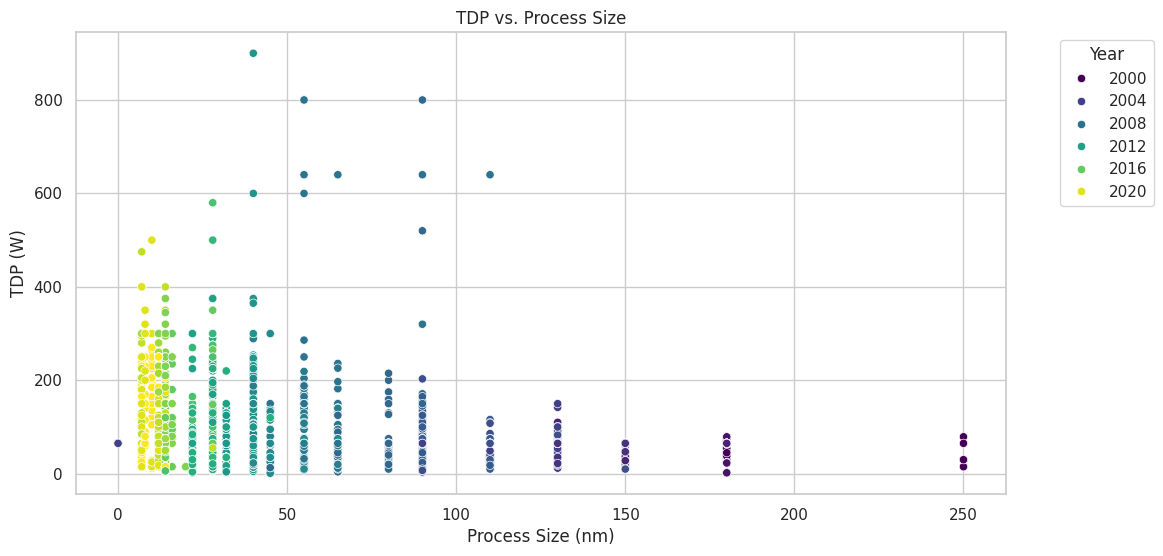

In [48]:
# Plot 3: Power Consumption (TDP) vs. Process Size
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Process Size (nm)', y='TDP (W)', hue='Year', palette='viridis')
plt.title('TDP vs. Process Size')
plt.xlabel('Process Size (nm)')
plt.ylabel('TDP (W)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [49]:
import plotly.express as px

# Plot TDP vs. Process Size
fig1 = px.scatter(
    df,
    x='Process Size (nm)',
    y='TDP (W)',
    color='Year',
    color_continuous_scale='Viridis',
    title='TDP vs. Process Size',
    labels={'Process Size (nm)': 'Process Size (nm)', 'TDP (W)': 'TDP (W)'},
)
fig1.update_layout(coloraxis_colorbar=dict(title='Year'))
fig1.show()


The relationship between chip power consumption (TDP) and shrinking process sizes.A negative correlation between process size and TDP would confirm that power consumption per unit area decreases with smaller transistors, validating Dennard Scaling.

Thermal Design Power, measured in watts (W). It refers to the maximum amount of heat generated by a computer chip (like a GPU or CPU) that the cooling system is designed to dissipate under typical workload conditions. While not a direct measurement of energy use, it is indicative of the heat output and, by extension, the electrical power required to operate the chip.



The relationship between power consumption (TDP) and transistor count on a logarithmic scale.If Dennard Scaling holds, TDP should remain relatively stable or increase slowly compared to the exponential growth of transistor counts. A sharp increase in TDP relative to transistor count would indicate a breakdown of Dennard Scaling.

In [50]:
# Statistical Summary
correlation = df[['Process Size (nm)', 'TDP (W)', 'Transistors (million)']].corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                       Process Size (nm)   TDP (W)  Transistors (million)
Process Size (nm)               1.000000 -0.157678              -0.347620
TDP (W)                        -0.157678  1.000000               0.454982
Transistors (million)          -0.347620  0.454982               1.000000


# 3.CPUs have higher frequencies, but GPUs are catching up.

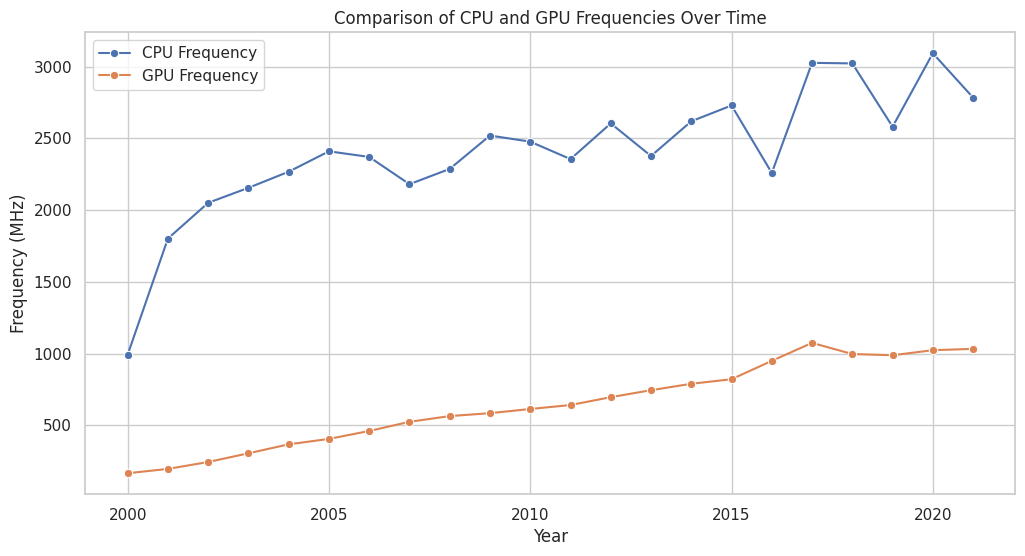

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for CPUs and GPUs
cpu_data = df[df['Type'] == 'CPU']
gpu_data = df[df['Type'] == 'GPU']

# Group by Year and calculate the mean Frequency for CPUs and GPUs
cpu_freq_trend = cpu_data.groupby('Year')['Freq (MHz)'].mean().reset_index()
gpu_freq_trend = gpu_data.groupby('Year')['Freq (MHz)'].mean().reset_index()

# Merge CPU and GPU trends for direct comparison
freq_comparison = cpu_freq_trend.merge(
    gpu_freq_trend,
    on='Year',
    suffixes=('_CPU', '_GPU')
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=freq_comparison, x='Year', y='Freq (MHz)_CPU', label='CPU Frequency', marker='o')
sns.lineplot(data=freq_comparison, x='Year', y='Freq (MHz)_GPU', label='GPU Frequency', marker='o')

plt.title('Comparison of CPU and GPU Frequencies Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency (MHz)')
plt.legend()
plt.grid(True)
plt.show()


# 4.GPU performance doubles every 1.5 years

<ipython-input-52-ce1b6674adf9>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



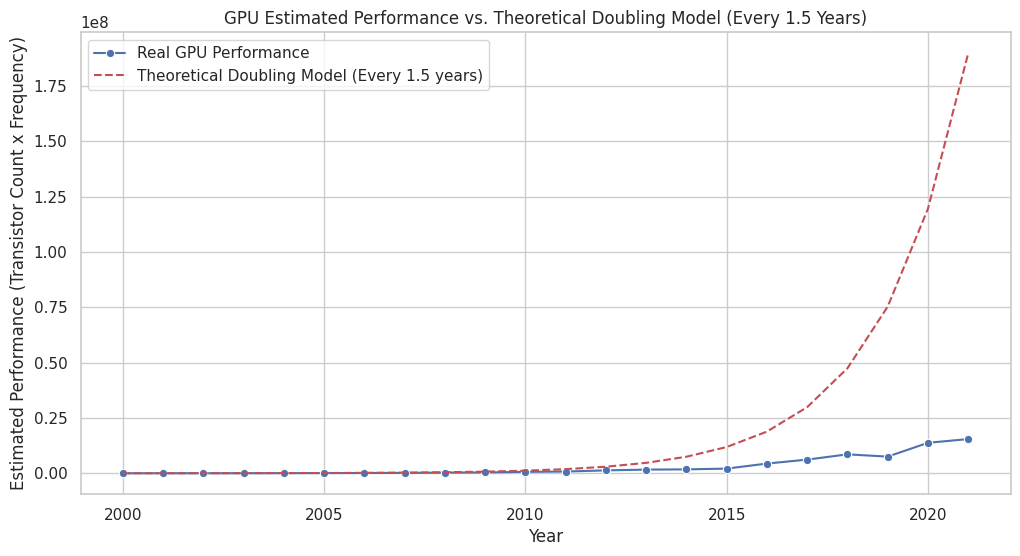

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data for GPUs
gpu_data = df[df['Type'] == 'GPU']

# Create an estimated performance metric based on Transistor Count and Frequency
gpu_data['Estimated Performance'] = gpu_data['Transistors (million)'] * gpu_data['Freq (MHz)']

# Group by Year and calculate the mean of the estimated performance for each year
gpu_performance_trend = gpu_data.groupby('Year')['Estimated Performance'].mean().reset_index()

# Exponential Growth Model: Doubling every 1.5 years
# Assume the initial performance at the first year (earliest year in dataset)
initial_performance = gpu_performance_trend['Estimated Performance'].iloc[0]
years = gpu_performance_trend['Year']

# Theoretical model: Performance doubles every 1.5 years
doubling_time = 1.5  # Doubling every 1.5 years
theoretical_performance = initial_performance * (2 ** ((years - years.iloc[0]) / doubling_time))

# Plot the real GPU performance vs theoretical doubling model
plt.figure(figsize=(12, 6))
sns.lineplot(data=gpu_performance_trend, x='Year', y='Estimated Performance', label='Real GPU Performance', marker='o', color='b')
plt.plot(years, theoretical_performance, label='Theoretical Doubling Model (Every 1.5 years)', color='r', linestyle='--')

plt.title('GPU Estimated Performance vs. Theoretical Doubling Model (Every 1.5 Years)')
plt.xlabel('Year')
plt.ylabel('Estimated Performance (Transistor Count x Frequency)')
plt.legend()
plt.grid(True)
plt.show()


 If the real GPU performance closely follows the theoretical performance, it indicates that the GPU industry is largely adhering to Moore’s Law, meaning that transistor density and performance are improving at the expected rate

# 5.GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency

<ipython-input-59-cf13ac51f5ab>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



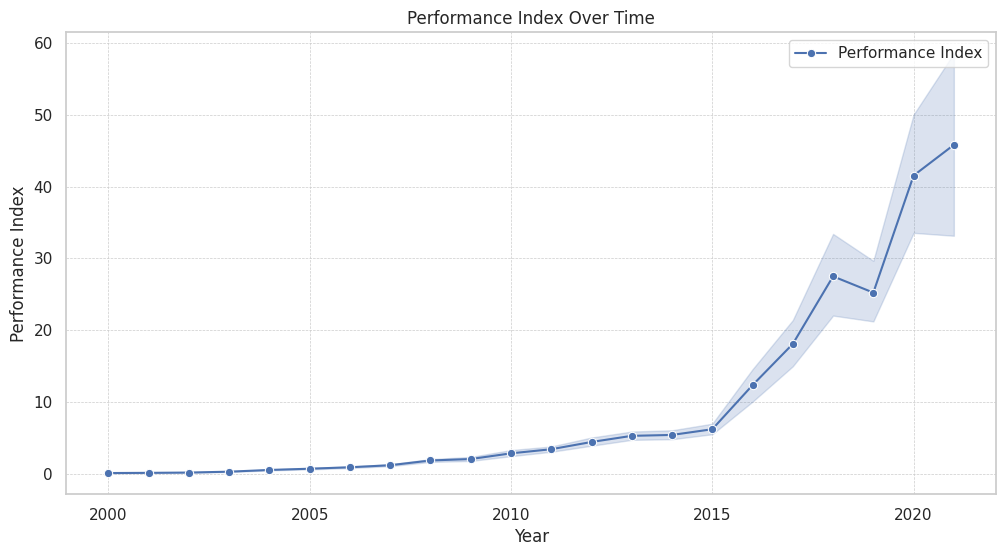

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate an estimated "Performance Index"
gpu_data['Performance Index'] = (
    (gpu_data['Freq (MHz)'] / 1000) * gpu_data['Die Size (mm^2)'] / gpu_data['Process Size (nm)']
)

# Plot 1: Performance Index vs. Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=gpu_data, x='Year', y='Performance Index', marker='o', label='Performance Index')
plt.title('Performance Index Over Time')
plt.xlabel('Year')
plt.ylabel('Performance Index')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()



The upward trend illustrates the overall improvement in GPU performance due to advancements in technology.

In [65]:
import plotly.express as px

# Plot 2: Frequency vs. Die Size
fig1 = px.scatter(
    gpu_data,
    x='Die Size (mm^2)',
    y='Freq (MHz)',
    color='Process Size (nm)',
    size='Performance Index',
    color_continuous_scale='RdBu',  # Replacing 'coolwarm' with a valid Plotly colorscale
    title='Frequency vs. Die Size with Process Size (nm)',
    labels={'Die Size (mm^2)': 'Die Size (mm²)', 'Freq (MHz)': 'Frequency (MHz)', 'Process Size (nm)': 'Process Size (nm)'},
    template='plotly_white'
)
fig1.update_traces(marker=dict(opacity=0.8))
fig1.update_layout(
    coloraxis_colorbar=dict(title='Process Size (nm)'),
    legend=dict(title='Legend', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)
fig1.show()



Smaller process sizes (nm) are represented by the color gradient, showing that higher-frequency GPUs tend to use newer semiconductor technologies.

In [63]:
# Plot 3: Performance Index vs. Transistor Count
fig2 = px.scatter(
    gpu_data,
    x='Transistors (million)',
    y='Performance Index',
    color='Year',
    size='Process Size (nm)',
    color_continuous_scale='viridis',
    title='Performance Index vs. Transistor Count',
    labels={'Transistors (million)': 'Transistor Count (million)', 'Performance Index': 'Performance Index', 'Year': 'Year'},
    template='plotly_white',
    log_x=True,  # Log scale for x-axis
    log_y=True   # Log scale for y-axis
)
fig2.update_traces(marker=dict(opacity=0.8))
fig2.update_layout(
    coloraxis_colorbar=dict(title='Year'),
    legend=dict(title='Legend', orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)
fig2.show()

smaller transistors contribute to better performance.

# 6.High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.

In [57]:
import plotly.express as px

# Define high-end and low-end GPUs based on some criteria (e.g., Freq or another column).
# High-end GPUs are those with frequency > 1000 MHz
gpu_data['GPU_Type'] = gpu_data['Freq (MHz)'].apply(lambda x: 'High-end' if x > 1000 else 'Low-end')

# Create the scatter plot using Plotly
fig = px.scatter(
    gpu_data,
    x='Year',
    y='Process Size (nm)',
    color='GPU_Type',
    symbol='GPU_Type',
    color_discrete_map={'High-end': 'red', 'Low-end': 'blue'},
    labels={'Process Size (nm)': 'Process Size (nm)', 'Year': 'Year', 'GPU_Type': 'GPU Type'},
    title='Process Size (nm) vs. Year for High-end vs Low-end GPUs',
    hover_data=['Product', 'Freq (MHz)']
)

# Customize layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Process Size (nm)',
    legend_title='GPU Type',
    legend=dict(x=1.05, y=1),  # Position legend outside plot
)

# Show the plot
fig.show()


<ipython-input-57-1a66804684e6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



High-end GPUs tend to appear on the graph first when a new, smaller process size is introduced. This indicates that these GPUs are using the latest semiconductor technologies.
Low-end GPUs are clustered around older, larger process sizes even as time progresses. This suggests that these GPUs continue to use older technologies for a few years after high-end GPUs have moved to newer technologies.

# 7.Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

In [67]:
import plotly.express as px

# Filter for relevant vendors
relevant_vendors = ['Intel', 'AMD', 'NVIDIA', 'ATI', 'Other']
gpu_data_filtered = gpu_data[gpu_data['Vendor'].isin(relevant_vendors)]

# Create a boxplot for Process Size by Vendor
fig = px.box(
    gpu_data_filtered,
    x='Vendor',
    y='Process Size (nm)',
    color='Vendor',
    title='Comparison of Process Size (nm) by Vendor',
    labels={'Process Size (nm)': 'Process Size (nm)', 'Vendor': 'Vendor'},
    template='plotly_white'
)

# Update layout for better clarity
fig.update_layout(
    xaxis_title="Vendor",
    yaxis_title="Process Size (nm)",
    legend_title="Vendor",
    showlegend=False
)

# Show the plot
fig.show()


# 8.TSMC makes the highest number of chips in the world

In [68]:
# Group by Foundry and count the number of entries
foundry_chip_counts = gpu_data.groupby('Foundry').size().reset_index(name='Chip Count')

# Sort the counts in descending order
foundry_chip_counts = foundry_chip_counts.sort_values(by='Chip Count', ascending=False)

# Plot using Plotly
fig = px.bar(
    foundry_chip_counts,
    x='Foundry',
    y='Chip Count',
    color='Chip Count',
    title='Chip Production by Foundry',
    labels={'Chip Count': 'Number of Chips Produced', 'Foundry': 'Foundry'},
    template='plotly_white'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Foundry",
    yaxis_title="Number of Chips Produced",
    xaxis_tickangle=45,
    showlegend=False
)

# Show the plot
fig.show()
